In [130]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

0


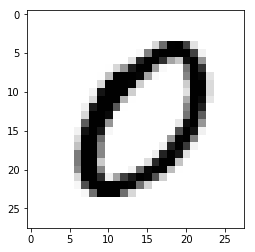

In [131]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7037 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [132]:
x_train.shape

(60000, 28, 28)

In [133]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [134]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1955 - acc: 0.9419
Epoch 2/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0789 - acc: 0.9762
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0540 - acc: 0.9828 1s - loss: 0.05
Epoch 4/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0411 - acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0343 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0282 - acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0236 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0216 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0191 - acc: 0.9937
Epoch 10/10
60000/60000 [=========

In [9]:
model.save('zipcode.h5')

In [135]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model = load_model('zipcode.h5')

Exception ignored in: <function BaseSession._Callable.__del__ at 0x000001F9B17EC7B8>
Traceback (most recent call last):
  File "C:\Users\bspaynic\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\bspaynic\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 551246800016
Exception ignored in: <function BaseSession._Callable.__del__ at 0x000001F9B17EC7B8>
Traceback (most recent call last):
  File "C:\Users\bspaynic\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\bspaynic\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\f

In [136]:
filepath = "../photos/two.png"

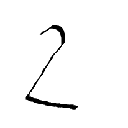

In [137]:
from keras.preprocessing import image
image_size = (128,128)
im = image.load_img(filepath, target_size=image_size, color_mode = "grayscale")
im

In [138]:
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(128, 128, 1)

In [139]:
image /= 255
img = image.flatten().reshape(-1, 128*128)
img.shape

(1, 16384)

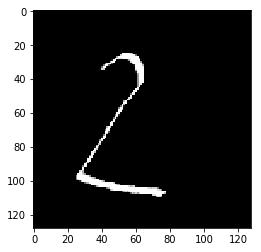

In [140]:
plt.imshow(img.reshape(128, 128), cmap=plt.cm.Greys)

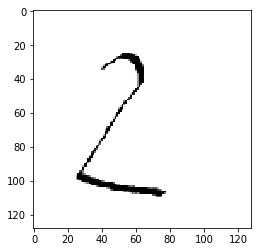

In [141]:
img = 1 - img
plt.imshow(img.reshape(128,128), cmap=plt.cm.Greys)

In [142]:
model.predict_classes(img)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 16384)